# Conducting Survival Prediction for the Titanic Dataset
**Author:** Eric Meyer

**Date:** 03/19/2025  

**Objective:** Predict survival rate of people on the Titantic.


## Introduction
This project uses the Titanic dataset to predict passenger survival based on features such as age, fare, passenger class, and family size. We'll clean the data, handle missing values, train a classification model, and explore ways to improve predictive performance.

## Imports
In the code cell below, import the necessary Python libraries for this notebook.  

In [3]:
# Import pandas for data manipulation and analysis (we might want to do more with it)
import pandas as pd

# Import pandas for data manipulation and analysis  (we might want to do more with it)
import numpy as np

# Import matplotlib for creating static visualizations
import matplotlib.pyplot as plt

# Import seaborn for statistical data visualization (built on matplotlib)
import seaborn as sns

# Import train_test_split for splitting data into training and test sets
from sklearn.model_selection import train_test_split

# Import LinearRegression for building a linear regression model
from sklearn.linear_model import LinearRegression

# Import performance metrics for model evaluation
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

This is a Markdown cell

## Section 1. Load and Explore the Data

### 1.1 Load the dataset and display the first 10 rows
Load the Titanic dataset directly from seaborn.
- Convert it into a pandas DataFrame.
- Display just the first 10 rows using `head()`.

In [5]:
# Load Titanic dataset
data_frame = sns.load_dataset('titanic')

# Might be large. Display just the first 10 rows (you can change this number)
data_frame.head(10)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


This is a Markdown cell.

### 1.2 Check for missing values and display summary statistics

In the cell below:
1. Use `info()` to check data types and missing values.
2. Use `describe()` to see summary statistics.
3. Use `isnull().sum()` to identify missing values in each column.

Example code:

data_frame.info()

data_frame.describe()

data_frame.isnull().sum()

In [8]:
# Check data info
data_frame.info()

# Check summary of stats for data
data_frame.describe()

# Check for any null values
data_frame.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
# Check for correlations useing the corr() method
print(data_frame.corr(numeric_only=True))

            survived    pclass       age     sibsp     parch      fare  \
survived    1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307   
pclass     -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500   
age        -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067   
sibsp      -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651   
parch       0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225   
fare        0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000   
adult_male -0.557080  0.094035  0.280328 -0.253586 -0.349943 -0.182024   
alone      -0.203367  0.135207  0.198270 -0.584471 -0.583398 -0.271832   

            adult_male     alone  
survived     -0.557080 -0.203367  
pclass        0.094035  0.135207  
age           0.280328  0.198270  
sibsp        -0.253586 -0.584471  
parch        -0.349943 -0.583398  
fare         -0.182024 -0.271832  
adult_male    1.000000  0.404744  
alone         0.404744  1.000000  


Analysis: 

1) How many data instances (also called data records or data rows) are there? **891**

2) How many features (also columns or attributes) are there? **15**

3) What are the names of the features? ("Feature" is used most often in ML projects.) **survived, pclass, sex, age, sibsp, parch, fare, embarked, class, who, adult_male, deck, embark_town, alive, and alone**

4) Are there any missing values? **177 in age, 2 in embarked, 688 in deck, and 2 in emark_town**

5) Are there any non-numeric features? **sex, embarked, class, who, alive, and embark_town**

6) Are the data instances sorted on any of the attributes? **No**
   
7) What are the units of age? **Years**
   
8) What are the minimum, median and max age? **Min is 0.42, median is 28, and max is 80**
   
9)  What two different features have the highest correlation? **Parch and sibsp at 0.414838**
    
10) Are there any categorical features that might be useful for prediction? **Some that could be good are: pclass, sex, and who**

## Section 2. Data Exploration and Preparation
Now we need to explore our dataset with charts - and depending on what we've learned, we might need to clean it (deal with missing or outlying data) and maybe do some feature engineering - should we add some calculated fields that would make for better insights (e.g. BMI with the Howell dataset.) What should we chart? Histograms for numeric fields? Scatter plots? We suggest some below, but learning to figure out what you need is a key skill. 

### 2.1 Explore Data Patterns and Distributions
Create a scatter matrix. Since Titanic contains both numeric and categorical variables, we'll use only numeric values here. Important:  Use only numeric attributes for the scatter matrix. If you want to explore categorical data, use count plots and bar plots instead.

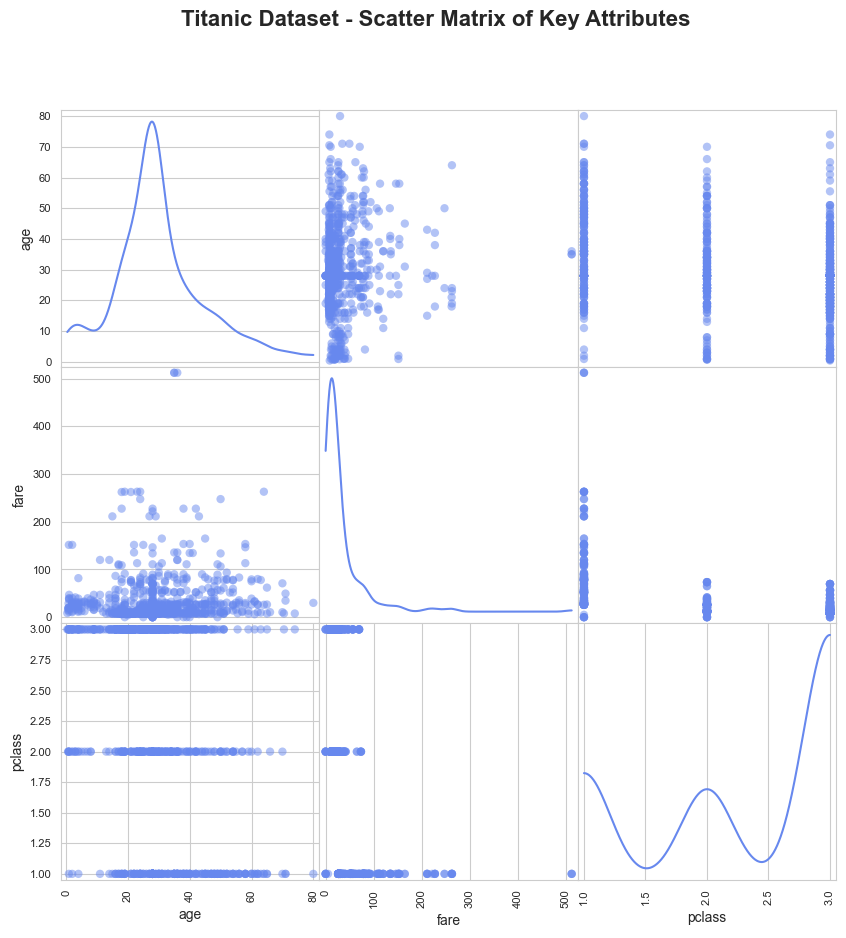

In [25]:
# Set a visually appealing style
sns.set_style("whitegrid")

# Define attributes to plot
attributes = ['age', 'fare', 'pclass']

# Create scatter matrix with improved styling
scatter_matrix(
    data_frame[attributes], 
    figsize=(10, 10), 
    diagonal='kde',
    marker='o', 
    alpha=0.5
)

# Enhance readability
plt.suptitle("Titanic Dataset - Scatter Matrix of Key Attributes", fontsize=16, fontweight="bold")
plt.show()


#### Create a scatter plot of age vs fare, colored by gender:

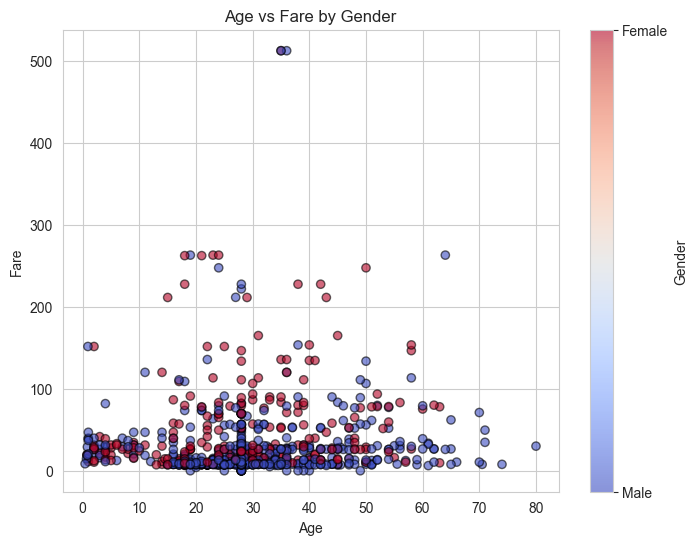

In [24]:
# Define color mapping: 0 = male (blue), 1 = female (red)
gender_colors = data_frame['sex'].apply(lambda x: 0 if x == 'male' else 1)

# Create scatter plot with a colormap
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    titanic['age'], titanic['fare'], 
    c=gender_colors, cmap='coolwarm', alpha=0.6, edgecolors='k'
)

# Add labels
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare by Gender')

# Add a colorbar legend
cbar = plt.colorbar(scatter, ticks=[0, 1])
cbar.set_label("Gender")
cbar.set_ticks([0, 1])
cbar.set_ticklabels(["Male", "Female"])

plt.show()

#### Create a histogram of age:

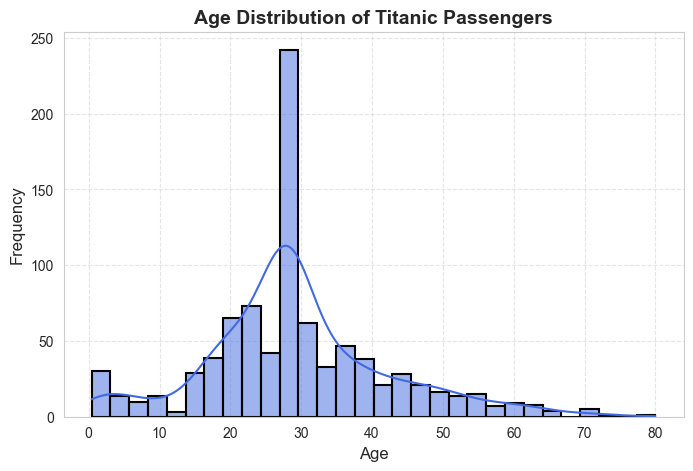

In [26]:
# Set a visually appealing Seaborn style
sns.set_style("whitegrid")

# Create histogram with improved styling
plt.figure(figsize=(8, 5))
sns.histplot(
    titanic['age'].dropna(),
    kde=True, 
    bins=30,
    color="royalblue",
    linewidth=1.5,
    edgecolor="black"
)

# Add title and labels with styling
plt.title('Age Distribution of Titanic Passengers', fontsize=14, fontweight="bold")
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Improve readability with grid and layout
plt.grid(True, linestyle="--", alpha=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

#### Create a count plot for class and survival:

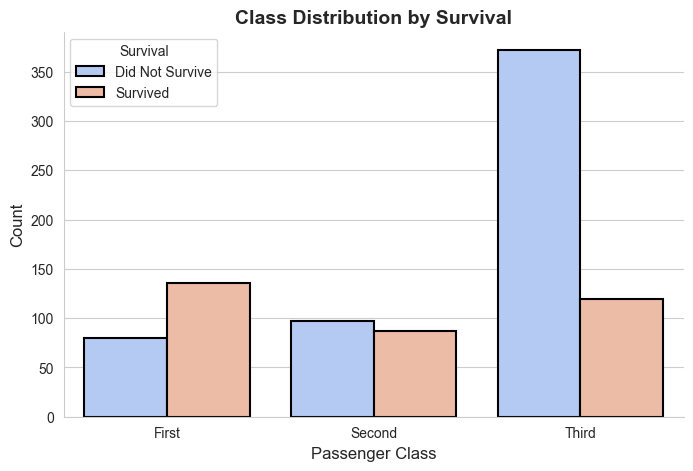

In [27]:
# Set a stylish Seaborn theme
sns.set_style("whitegrid")

# Create a countplot with better aesthetics
plt.figure(figsize=(8, 5))
ax = sns.countplot(
    x="class", hue="survived", data=data_frame, 
    palette="coolwarm",
    edgecolor="black", linewidth=1.5
)

# Add labels and title with styling
plt.title('Class Distribution by Survival', fontsize=14, fontweight="bold")
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Customize legend for clarity
legend_labels = ['Did Not Survive', 'Survived']
plt.legend(title="Survival", labels=legend_labels, fontsize=10)

# Improve layout readability
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine()

plt.show()

### Reflection 2.1 What patterns or anomalies do you notice?

It seems more females paid higher fares.

Heavy amount of population between 20 and 35 years of age.

By far the largest grou not to survive are from the third class.

### 2.2 Handle Missing Values and Clean Data

Age was missing values. We can impute missing values for age using the median:

titanic['age'].fillna(titanic['age'].median(), inplace=True)
Embark_town was missing values. We can drop missing values for embark_town (or fill with mode):

titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)

In [ ]:
# Replacing nulls in age to median
data_frame['age'].fillna(data_frame['age'].median(), inplace=True)

# Replacing nulls in embark_town with mode
data_frame['embark_town'].fillna(data_frame['embark_town'].mode()[0], inplace=True)

C:\Users\Lexi\AppData\Local\Temp\ipykernel_1828\33981535.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_frame['age'].fillna(data_frame['age'].median(), inplace=True)


In [21]:
# Our features
features: list = ['MedInc', 'AveRooms']

# Our target variable
target: str = 'MedHouseVal'

# Our input (X) and output (y) DataFrames
df_X = data_frame[features]
df_y = data_frame[target]

# Showing first rows of each
df_X.head(), df_y.head()

(   MedInc  AveRooms
 0  8.3252  6.984127
 1  8.3014  6.238137
 2  7.2574  8.288136
 3  5.6431  5.817352
 4  3.8462  6.281853,
 0    4.526
 1    3.585
 2    3.521
 3    3.413
 4    3.422
 Name: MedHouseVal, dtype: float64)

This is a Markdown Cell.


## Section 4. Train a Linear Regression Model
### 4.1 Split the data
Split the dataset into training and test sets (80% train / 20% test).

Call train_test_split() by passing in: 

- df_X – Feature matrix (input data) as a pandas DataFrame
- y – Target values as a pandas Series
- test_size – Fraction of data to use for testing (e.g., 0.1 = 10%)
- random_state – Seed value for reproducible splits

We'll get back four return values:

- X_train – Training set features (DataFrame)
- X_test – Test set features (DataFrame)
- y_train – Training set target values (Series)
- y_test – Test set target values (Series)


Example code:

X_train, X_test, y_train, y_test = train_test_split(
    df_X, df_y, test_size=0.2, random_state=42)


In [24]:
# Import the train_test_split function
from sklearn.model_selection import train_test_split

# Training and test datasets
X_train, X_test, y_train, y_test = train_test_split(
    df_X,  # Feature matrix
    df_y,  # Target values
    test_size=0.2,  # 20% of data for testing
    random_state=42  # Seed for reproducibility
)

# Print the shapes of the resulting splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (16512, 2)
X_test shape: (4128, 2)
y_train shape: (16512,)
y_test shape: (4128,)


This is a Markdown Cell.

### 4.2 Train the model
Create and fit a `LinearRegression` model.

LinearRegression – A class from sklearn.linear_model that creates a linear regression model.

model – An instance of the LinearRegression model. This object will store the learned coefficients and intercept after training.

fit() – Trains the model by finding the best-fit line for the training data using the Ordinary Least Squares (OLS) method.

X_train – The input features used to train the model.

y_train – The target values used to train the model.


Example code:


model = LinearRegression()

model.fit(X_train, y_train)


In [25]:
# Import the LinearRegression class
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Output the learned coefficients and intercept
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")



Coefficients: [ 0.43626089 -0.04017161]
Intercept: 0.5972677793933256


This is a Markdown Cell.

Make predictions for the test set.

The model.predict() method applies this equation to the X test data to compute predicted values.

y_pred = model.predict(X_test)

y_pred contains all the predicted values for all the rows in X_test based on the linear regression model.


Example code:

y_pred = model.predict(X_test)


In [26]:
# Use the trained model to make predictions on the test data
y_pred = model.predict(X_test)

# Output the predicted values
print(f"Predictions: {y_pred[:5]}")  # Show the first 5 predicted values


Predictions: [1.16230214 1.49913482 1.95573059 2.85275505 2.00167731]


This is a Markdown Cell. 

### 4.3 Report R^2, MAE, RMSE
Evaluate the model using R^2, MAE, and RMSE.

First:

- Coefficient of Determination (R^2) - This tells you how well the model explains the variation in the target variable. A value close to 1 means the model fits the data well; a value close to 0 means the model doesn’t explain the variation well.


Example code:
  
r2 = r2_score(y_test, y_pred)

print(f'R²: {r2:.2f}')



In [27]:

# Import evaluation metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Calculate R²
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2:.2f}')

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.2f}')

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


R²: 0.46
Mean Absolute Error (MAE): 0.62
Root Mean Squared Error (RMSE): 0.84



This is a Markdown Cell

Second:

- Mean Absolute Error (MAE) - This is the average of the absolute differences between the predicted values and the actual values. A smaller value means the model’s predictions are closer to the actual values.


Example code:

mae = mean_absolute_error(y_test, y_pred)

print(f'MAE: {mae:.2f}')




In [29]:
# Import the mean_absolute_error function
from sklearn.metrics import mean_absolute_error

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.2f}')


Mean Absolute Error (MAE): 0.62



This is a Markdown Cell

Third:

- Root Mean Squared Error (RMSE) - This is the square root of the average of the squared differences between the predicted values and the actual values. It gives a sense of how far the predictions are from the actual values, with larger errors having more impact.

Example code:

rmse = root_mean_squared_error(y_test, y_pred)

print(f'RMSE: {rmse:.2f}')


In [31]:
# Import the required function for RMSE
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


Root Mean Squared Error (RMSE): 0.84
